# Perceptron Learning Algorithm

![alt text](perceptron.png)

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [82]:
iris = pd.read_csv("iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [83]:
y = iris.iloc[0:100, 4].values        #making array of PetalWidthCm
X = np.array(iris.iloc[0:100,[0,2]])  #making array of Id and septalWidthCm
bias = np.ones((100,1))
X = np.hstack((bias,X))

In [84]:
#y = np.where(y == 'Iris-setosa', -1, 1)

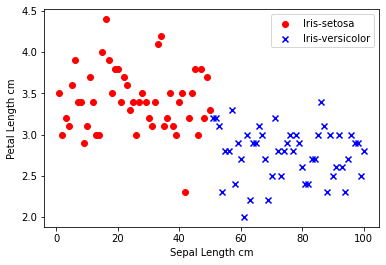

In [85]:
#checking if data is linearly serparable

plt.scatter(X[:50, 1], X[:50, 2],
            color='red', marker='o', label='Iris-setosa')
plt.scatter(X[50:100, 1], X[50:100, 2],
            color='blue', marker='x', label='Iris-versicolor')

plt.xlabel('Sepal Length cm')
plt.ylabel('Petal Length cm')
plt.legend(loc='upper right')

plt.show()

In [86]:
#Sign Function
def h(weight_vec, data_vec):
    """weight_vec : numpy array
       data_vec   : numpy array
       output: {-1, 1}
    """
    if weight_vec @ data_vec > 0:
        return 1
    else:
        return -1

In [87]:
def perceptron(data, labels, iterations):
    """ Perceptron Learning Algorithm
    
        data       : data stored as numpy arrays
        labels     : list of elements from {1, -1} 
        iterations : number of iterations of the perceptron update rule (default 1000)
        
    Output:
        weights    : three dimensional weight vector stored as a numpy array
    """
    weights = np.random.rand(3)
    n_data_entries = len(labels)
    
    perceptron.errors_ = []
    
    errors = 0
    for _ in range(iterations):
        i = np.random.randint(n_data_entries)
        if h(weights, data[i]) != labels[i]:
            weights += labels[i]*data[i]
            errors += 1
            perceptron.errors_.append(errors)
                
    perceptron.weights = weights
    return weights

In [88]:
w = perceptron(X, y, 1000)

Text(0, 0.5, 'Number of updates')

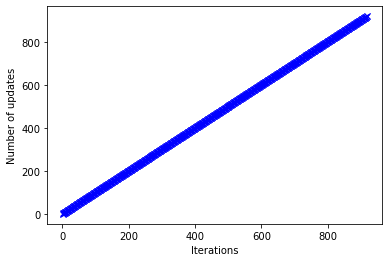

In [89]:
plt.plot(range(1, len(perceptron.errors_) + 1), perceptron.errors_, marker='x', color = 'blue')
plt.xlabel('Iterations')
plt.ylabel('Number of updates')

In [90]:
def predict(w, i):
    if h(w, X[i]) == -1:
        return 'Setosa'
    else:
        return 'Versicolor'

In [93]:
predict(w, 0)

'Versicolor'